# Car Insurance Claim Prediction

**Introduction:**

In a classification problem most of the times we encounter problem of class imbalance. It is very important to understand what an imbalanced dataset is and how do we handle and evaluate a classification model build on imbalanced dataset. For e.g. You are given a dataset to predict insurance claims. You have built a classification model and achieved an accuracy of ~96%.
1. Why shouldn't you be happy with your model performance?
2. What can you do about it.

**Problem Statement:**

One of the largest auto insurance company is facing problem of inaccuracies in car insurance claim predictions. This eventually leads them to raise the cost of insurance of good drivers and reduce it for bad drivers. The company wants you to

- Build a model that predicts the probability that a driver will file an insurance claim in coming year.

**Data Understanding:**

The dataset has close to 600K observations with 59 columns. This include "id" and "target" column. Therefore 57 features (inputs). Data is annonymized in order to protect the company's trade secrets, but some information about the nature of each varaible. Each row corresponds to a policy holder, and the target columns signifies that a claim was filed.

1. Values of -1 indicate that the feature was missing from the observation.
2. Target column signifies whether or not a claim was filed for that policy holder.
3. Ind is related to individual or driver
4. Reg is related to region
5. Car is related to car itself
6. Calc is a calculated feature
7. Feature names include the postfix bin to indicate binary features and cat to indicate categorical features.
8. Features without these designations are either continuous or ordinal

Okay, lets get started and look at the dataset.

## Importing modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import the sklearn and its corresponding modules
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Reading and understanding data

In [4]:
#reading the csv file
df = pd.read_csv('train.csv')
df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [5]:
df.shape

(595212, 59)

In [6]:
df.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [8]:
df.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.012451,7.299922,0.660823,0.121081,0.153446,0.610991,0.439184,0.551102,8.295933,0.829931,-0.504899,0.725192,-0.157732,6.555340,0.910027,0.832080,1.328890,0.992136,62.215674,2.346072,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.127545,3.546042,0.473430,0.326222,0.360417,0.287643,0.404264,0.793506,2.508270,0.375716,0.788654,2.153463,0.844417,5.501445,0.347106,0.373796,0.978747,0.091619,33.012455,0.832548,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,1.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.400000,0.200000,0.525000,7.000000,1.000000,-1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000,2.000000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.700000,0.300000,0.720677,7.000000,1.000000,-1.000000,0.000000,0.000000,7.0000

## Data Cleaning

In [9]:
#checking the null value count
df.isnull().sum()

,0
id,0
target,0
ps_ind_01,0
ps_ind_02_cat,0
ps_ind_03,0
ps_ind_04_cat,0
ps_ind_05_cat,0
ps_ind_06_bin,0
ps_ind_07_bin,0
ps_ind_08_bin,0


**No Null values**

- There are -1 values in the data instead of null values.
- So those values are replaced with -1.

In [11]:
df = df.replace(-1, np.nan)
df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2.0,5,1.0,0.0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10.0,1.0,NaN,0,1.0,4,1.0,0,0.0,1,12,2.0,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1.0,7,0.0,0.0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11.0,1.0,NaN,0,NaN,11,1.0,1,2.0,1,19,3.0,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4.0,9,1.0,0.0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,NaN,7.0,1.0,NaN,0,NaN,14,1.0,1,2.0,1,60,1.0,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1.0,2,0.0,0.0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7.0,1.0,0.0,0,1.0,11,1.0,1,3.0,1,104,1.0,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2.0,0,1.0,0.0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11.0,1.0,NaN,0,NaN,14,1.0,1,2.0,1,82,3.0,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [12]:
#checking the count of null values
df.isnull().sum().sort_values(ascending=False)

,0
ps_car_03_cat,411231
ps_car_05_cat,266551
ps_reg_03,107772
ps_car_14,42620
ps_car_07_cat,11489
ps_ind_05_cat,5809
ps_car_09_cat,569
ps_ind_02_cat,216
ps_car_01_cat,107
ps_ind_04_cat,83


In [13]:
#checking the percentage of null values
a = round(df.isnull().sum()*100/len(df))
a.sort_values(ascending=False)

,0
ps_car_03_cat,69.0
ps_car_05_cat,45.0
ps_reg_03,18.0
ps_car_14,7.0
ps_car_07_cat,2.0
ps_ind_05_cat,1.0
ps_calc_06,0.0
ps_car_11,0.0
ps_car_12,0.0
ps_car_13,0.0


In [14]:
#checking the highest null valued columns
a_null = a[a>40].sort_values(ascending=False)
a_null

,0
ps_car_03_cat,69.0
ps_car_05_cat,45.0


In [15]:
#drop them
df.drop(a_null.index, axis=1, inplace=True)

In [16]:
#again check the null value percentage
a = round(df.isnull().sum()*100/len(df))
a.sort_values(ascending=False)

,0
ps_reg_03,18.0
ps_car_14,7.0
ps_car_07_cat,2.0
ps_ind_05_cat,1.0
id,0.0
ps_calc_06,0.0
ps_car_11,0.0
ps_car_12,0.0
ps_car_13,0.0
ps_car_15,0.0


## Imputation of data

In [18]:
#impute the minimum null value numerical columns with mean()
num_null_col = ['ps_reg_03', 'ps_car_11', 'ps_car_12', 'ps_car_14']

In [19]:
for i in num_null_col:
  print(i, df[i].isnull().sum())

ps_reg_03 107772
ps_car_11 5
ps_car_12 1
ps_car_14 42620


In [20]:
for i in num_null_col:
  df[i] =df[i].fillna(df[i].mean())

In [21]:
df[num_null_col].isnull().sum()

,0
ps_reg_03,0
ps_car_11,0
ps_car_12,0
ps_car_14,0


In [22]:
#impute the minimum null value categorical columns with mean()
cat_null_col = ['ps_ind_02_cat','ps_ind_04_cat','ps_ind_05_cat','ps_car_01_cat','ps_car_02_cat','ps_car_07_cat','ps_car_09_cat']

In [23]:
for i in cat_null_col:
  print(i, df[i].isnull().sum())

ps_ind_02_cat 216
ps_ind_04_cat 83
ps_ind_05_cat 5809
ps_car_01_cat 107
ps_car_02_cat 5
ps_car_07_cat 11489
ps_car_09_cat 569


In [24]:
for i in cat_null_col:
  df[i] =df[i].fillna(df[i].mode()[0])

In [25]:
df[cat_null_col].isnull().sum()

,0
ps_ind_02_cat,0
ps_ind_04_cat,0
ps_ind_05_cat,0
ps_car_01_cat,0
ps_car_02_cat,0
ps_car_07_cat,0
ps_car_09_cat,0


In [26]:
#check again
a = round(df.isnull().sum()*100/len(df))
a.sort_values(ascending=False)

,0
id,0.0
ps_car_09_cat,0.0
ps_car_11_cat,0.0
ps_car_11,0.0
ps_car_12,0.0
ps_car_13,0.0
ps_car_14,0.0
ps_car_15,0.0
ps_calc_01,0.0
ps_calc_02,0.0


**No Null values**

## Data Visualization

In [31]:
num_columns = ['ps_ind_01','ps_ind_03','ps_ind_14','ps_ind_15','ps_car_11','ps_calc_04','ps_calc_05','ps_calc_06',
               'ps_calc_07','ps_calc_08','ps_calc_09','ps_calc_10','ps_calc_11','ps_calc_12','ps_calc_13','ps_calc_14',
               'ps_reg_01','ps_reg_02','ps_reg_03','ps_car_12','ps_car_13','ps_car_14','ps_car_15','ps_calc_01',
              'ps_calc_02','ps_calc_03','target'] #27

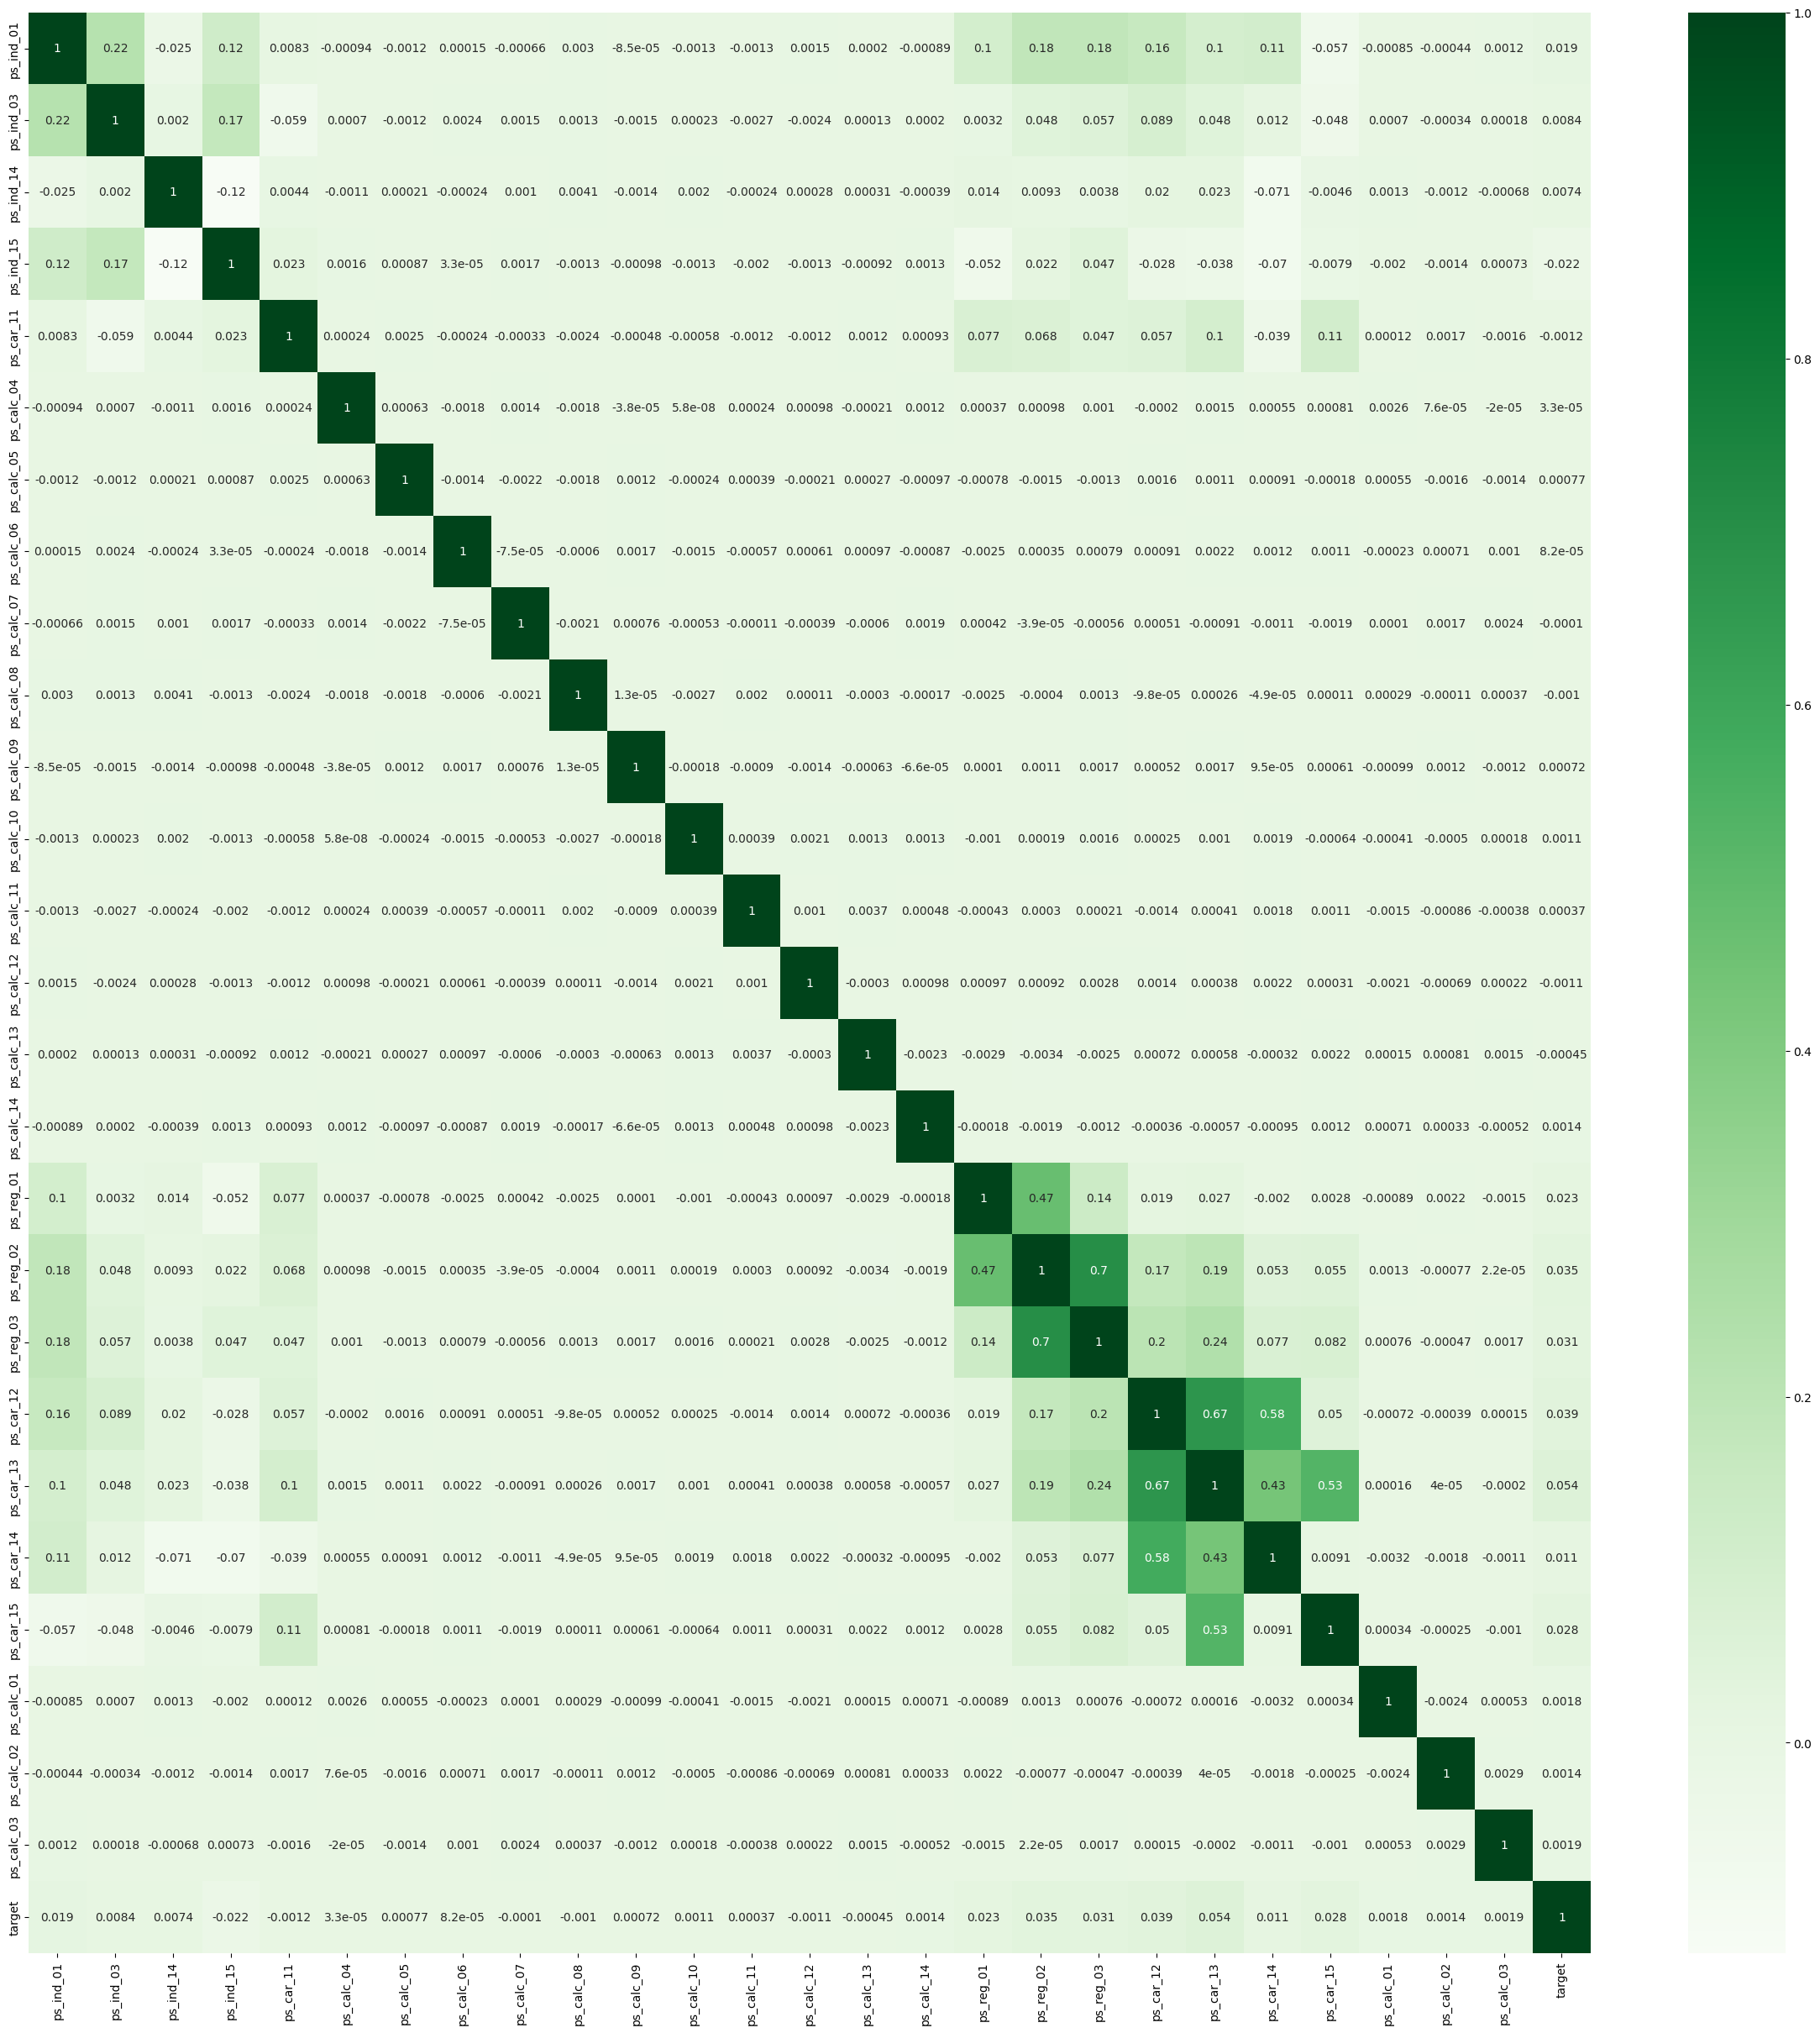

In [32]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(30,30))
sns.heatmap(df[num_columns].corr(), annot=True, cmap='Greens')
plt.show()

## Data Preparation

In [ ]:
cat_columns = ['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_04_cat','ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']

In [ ]:
for i in cat_columns:
  print(i,':', len(df[i].unique()))

ps_ind_02_cat : 4
ps_ind_04_cat : 2
ps_ind_05_cat : 7
ps_car_01_cat : 12
ps_car_02_cat : 2
ps_car_04_cat : 10
ps_car_06_cat : 18
ps_car_07_cat : 2
ps_car_08_cat : 2
ps_car_09_cat : 5
ps_car_10_cat : 3
ps_car_11_cat : 104


In [33]:
df[cat_columns] = df[cat_columns].astype('int64')

Ignore the column ps_car_11_cat because it has 104 unique value columns

In [34]:
cols = ['ps_ind_02_cat','ps_ind_04_cat','ps_ind_05_cat','ps_car_01_cat','ps_car_02_cat','ps_car_04_cat',
 'ps_car_06_cat','ps_car_07_cat','ps_car_08_cat','ps_car_09_cat','ps_car_10_cat']

In [35]:
#create the dummy variables for the categorical columns
df = pd.get_dummies(df, columns=cols, drop_first=True, dtype = 'int64')
df.head()

,id,target,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,ps_ind_02_cat_2,ps_ind_02_cat_3,ps_ind_02_cat_4,ps_ind_04_cat_1,ps_ind_05_cat_1,ps_ind_05_cat_2,ps_ind_05_cat_3,ps_ind_05_cat_4,ps_ind_05_cat_5,ps_ind_05_cat_6,ps_car_01_cat_1,ps_car_01_cat_2,ps_car_01_cat_3,ps_car_01_cat_4,ps_car_01_cat_5,ps_car_01_cat_6,ps_car_01_cat_7,ps_car_01_cat_8,ps_car_01_cat_9,ps_car_01_cat_10,ps_car_01_cat_11,ps_car_02_cat_1,ps_car_04_cat_1,ps_car_04_cat_2,ps_car_04_cat_3,ps_car_04_cat_4,ps_car_04_cat_5,ps_car_04_cat_6,ps_car_04_cat_7,ps_car_04_cat_8,ps_car_04_cat_9,ps_car_06_cat_1,ps_car_06_cat_2,ps_car_06_cat_3,ps_car_06_cat_4,ps_car_06_cat_5,ps_car_06_cat_6,ps_car_06_cat_7,ps_car_06_cat_8,ps_car_06_cat_9,ps_car_06_cat_10,ps_car_06_cat_11,ps_car_06_cat_12,ps_car_06_cat_13,ps_car_06_cat_14,ps_car_06_cat_15,ps_car_06_cat_16,ps_car_06_cat_17,ps_car_07_cat_1,ps_car_08_cat_1,ps_car_09_cat_1,ps_car_09_cat_2,ps_car_09_cat_3,ps_car_09_cat_4,ps_car_10_cat_1,ps_car_10_cat_2
0,7,0,2,5,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,12,2.0,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,9,0,1,7,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,19,3.0,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0
2,13,0,5,9,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,0.894047,60,1.0,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0
3,16,0,0,2,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,104,1.0,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0
4,17,0,0,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,82,3.0,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0


In [36]:
# removing irrelevant columns
cols_to_drop = ['ps_calc_01','ps_calc_02','ps_calc_03','ps_calc_04','ps_calc_05','ps_calc_06','ps_calc_07','ps_calc_08',
                'ps_calc_09','ps_calc_10','ps_calc_11','ps_calc_12','ps_calc_13','ps_calc_14','ps_calc_15_bin',
                'ps_calc_16_bin','ps_calc_17_bin','ps_calc_18_bin','ps_calc_19_bin','ps_calc_20_bin',
                'ps_car_11_cat']

df.drop(cols_to_drop, inplace=True, axis=1)
df.shape

(595212, 81)

In [37]:
#splitting the data into train and test datasets
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)

## Model Building

In [38]:
#create independent and dependent variables for train dataset
X_train = df_train.drop(['target','id'], axis=1)
y_train = df_train['target']

In [39]:
#create independent and dependent variables for test dataset
X_test = df_test.drop(['target','id'], axis=1)
y_test = df_test['target']

In [40]:
#create a model and fit it
rfc = RandomForestClassifier(random_state=42)

In [41]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [42]:
#get the feature names and their importance
l = list(zip(X_train.columns, rfc.feature_importances_))

[('ps_ind_01', 0.04967154693927527),
 ('ps_ind_03', 0.06395571956758193),
 ('ps_ind_06_bin', 0.006908094168902402),
 ('ps_ind_07_bin', 0.00791431015690351),
 ('ps_ind_08_bin', 0.00804311364436854),
 ('ps_ind_09_bin', 0.007794804906889034),
 ('ps_ind_10_bin', 0.00013686769385620992),
 ('ps_ind_11_bin', 0.00038353760001687384),
 ('ps_ind_12_bin', 0.0014957058840681628),
 ('ps_ind_13_bin', 0.00028264957176792673),
 ('ps_ind_14', 0.0018942723005599257),
 ('ps_ind_15', 0.067441888780377),
 ('ps_ind_16_bin', 0.008898736155230957),
 ('ps_ind_17_bin', 0.005327027737751739),
 ('ps_ind_18_bin', 0.007600441881653792),
 ('ps_reg_01', 0.04751202970204064),
 ('ps_reg_02', 0.05947400768195843),
 ('ps_reg_03', 0.10621693628425893),
 ('ps_car_11', 0.02130532672089071),
 ('ps_car_12', 0.03815841196151861),
 ('ps_car_13', 0.11559968040465937),
 ('ps_car_14', 0.07774484459368461),
 ('ps_car_15', 0.05043203138938393),
 ('ps_ind_02_cat_2', 0.012701202828240506),
 ('ps_ind_02_cat_3', 0.006748744334977669),
 

In [43]:
l = list(zip(X_train.columns, rfc.feature_importances_))
imp_data = pd.DataFrame(l, columns=['Feature','Importance']) # Create a DataFrame from the list
imp_data.sort_values(by=['Importance'], ascending=False) # Use sort_values on the DataFrame

,Feature,Importance
20,ps_car_13,0.115600
17,ps_reg_03,0.106217
21,ps_car_14,0.077745
11,ps_ind_15,0.067442
1,ps_ind_03,0.063956
16,ps_reg_02,0.059474
22,ps_car_15,0.050432
0,ps_ind_01,0.049672
15,ps_reg_01,0.047512
19,ps_car_12,0.038158


**Consider only the highly importance columns**

In [44]:
cols_for_model = ['ps_ind_01','ps_ind_03','ps_ind_15','ps_reg_01','ps_reg_02','ps_reg_03','ps_car_11','ps_car_12','ps_car_13',
                  'ps_car_14','ps_car_15','ps_ind_02_cat_2','ps_ind_04_cat_1','ps_car_01_cat_11','ps_car_06_cat_1',
                  'ps_car_06_cat_11','ps_car_09_cat_2','target']

In [45]:
df = df[cols_for_model]
df.head()

,ps_ind_01,ps_ind_03,ps_ind_15,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_ind_02_cat_2,ps_ind_04_cat_1,ps_car_01_cat_11,ps_car_06_cat_1,ps_car_06_cat_11,ps_car_09_cat_2,target
0,2,5,11,0.7,0.2,0.718070,2.0,0.400000,0.883679,0.370810,3.605551,1,1,0,0,0,0,0
1,1,7,3,0.8,0.4,0.766078,3.0,0.316228,0.618817,0.388716,2.449490,0,0,1,0,1,1,0
2,5,9,12,0.0,0.0,0.894047,1.0,0.316228,0.641586,0.347275,3.316625,0,1,0,0,0,1,0
3,0,2,8,0.9,0.2,0.580948,1.0,0.374166,0.542949,0.294958,2.000000,0,0,0,0,1,0,0
4,0,0,9,0.7,0.6,0.840759,3.0,0.316070,0.565832,0.365103,2.000000,1,1,1,0,0,1,0


In [46]:
df.columns

Index(['ps_ind_01', 'ps_ind_03', 'ps_ind_15', 'ps_reg_01', 'ps_reg_02',
       'ps_reg_03', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_ind_02_cat_2', 'ps_ind_04_cat_1', 'ps_car_01_cat_11',
       'ps_car_06_cat_1', 'ps_car_06_cat_11', 'ps_car_09_cat_2', 'target'],
      dtype='object')

In [47]:
#get the counts of target variable
print(df.target.value_counts())
df.target.value_counts(normalize = True).reset_index()

target
0    573518
1     21694
Name: count, dtype: int64


,target,proportion
0,0,0.963552
1,1,0.036448


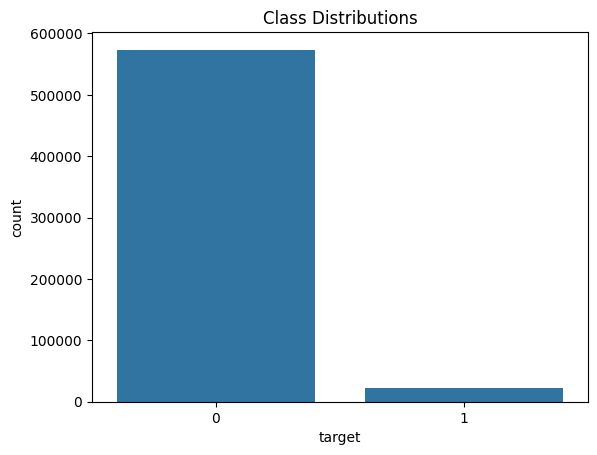

In [48]:
sns.barplot(df['target'].value_counts())
plt.title('Class Distributions')
plt.show()

So the data is imbalanced in this file.

## Class Imbalance using logistic regression

In [49]:
#again split the data into train and test sets based on new set of columns
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)

In [50]:
#create independent and dependent variables for train dataset
X_train = df_train.drop(['target'], axis=1)
y_train = df_train['target']

In [51]:
#create independent and dependent variables for test dataset
X_test = df_test.drop(['target'], axis=1)
y_test = df_test['target']

In [52]:
print(y_train.value_counts())
y_train.value_counts(normalize = True).reset_index()

target
0    401488
1     15160
Name: count, dtype: int64


,target,proportion
0,0,0.963614
1,1,0.036386


In [53]:
print(y_test.value_counts())
y_test.value_counts(normalize = True).reset_index()

target
0    172030
1      6534
Name: count, dtype: int64


,target,proportion
0,0,0.963408
1,1,0.036592


In [54]:
# Build a generic Logistic Regression model with X_train and y_train sets
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [55]:
lreg = LogisticRegression()
lreg.fit(X_train, y_train)

LogisticRegression()

In [56]:
y_train_pred = lreg.predict(X_train)
y_test_pred = lreg.predict(X_test)

In [58]:
print ('Accuracy: ', accuracy_score(y_test, y_test_pred))
print ('F1 score: ', f1_score(y_test, y_test_pred))
print ('Recall: ', recall_score(y_test, y_test_pred))
print ('Precision: ', precision_score(y_test, y_test_pred))
print ('\n clasification report:\n', classification_report(y_test,y_test_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_test_pred))

Accuracy:  0.9634080777760354
F1 score:  0.0
Recall:  0.0
Precision:  0.0

 clasification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    172030
           1       0.00      0.00      0.00      6534

    accuracy                           0.96    178564
   macro avg       0.48      0.50      0.49    178564
weighted avg       0.93      0.96      0.95    178564


 confussion matrix:
 [[172030      0]
 [  6534      0]]


The accuracy seems to high but all the other metrics are 0 for class-1 which is inappropriate.

**Random Under-Sampling**

1. Randomly remove majority class observations
2. Help balance the dataset
3. Discarded observations could have important information
4. May lead to bias

In [59]:
from imblearn.under_sampling import RandomUnderSampler
under_sampling = RandomUnderSampler(random_state=42)
X_resampUS_train, y_resampUS_train = under_sampling.fit_resample(X_train, y_train)

In [60]:
X_resampUS_train.shape, y_resampUS_train.shape

((30320, 17), (30320,))

In [61]:
lreg_us = LogisticRegression()
lreg_us.fit(X_resampUS_train, y_resampUS_train)

LogisticRegression()

In [62]:
y_train_pred_us = lreg_us.predict(X_resampUS_train)

In [63]:
y_test_pred_us = lreg_us.predict(X_test)

In [64]:
print ('Accuracy: ', accuracy_score(y_test, y_test_pred_us))
print ('F1 score: ', f1_score(y_test, y_test_pred_us))
print ('Recall: ', recall_score(y_test, y_test_pred_us))
print ('Precision: ', precision_score(y_test, y_test_pred_us))
print ('\n clasification report:\n', classification_report(y_test,y_test_pred_us))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_test_pred_us))

Accuracy:  0.6023946596178401
F1 score:  0.09095797802873166
Recall:  0.5436179981634527
Precision:  0.04963112005365526

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.60      0.75    172030
           1       0.05      0.54      0.09      6534

    accuracy                           0.60    178564
   macro avg       0.51      0.57      0.42    178564
weighted avg       0.94      0.60      0.72    178564


 confussion matrix:
 [[104014  68016]
 [  2982   3552]]


The accuracy and recall seems to be similar rather than the other metrics for class-1 which is somewhat better than original sets.

**Tomek Links**


1. Tomke link is a heuristic undersampling technique based on a distance measure.
2. Tomek link is established based on a distance between instances from two different classes which are further used for removing majority class instance.

In [65]:
#from imblearn.under_sampling import TomekLinks
#tomek_link = TomekLinks(sampling_strategy='majority')
#X_resampTL_train, y_resampTL_train = tomek_link.fit_resample(X_train, y_train)

In [66]:
#X_resampTL_train.shape, y_resampTL_train.shape

In [67]:
#lreg_tl = LogisticRegression()
#lreg_tl.fit(X_resampTL_train, y_resampTL_train)

In [68]:
#y_test_pred_tl = lreg_tl.predict(X_test)

In [69]:
#print ('Accuracy: ', accuracy_score(y_test, y_test_pred_tl))
#print ('F1 score: ', f1_score(y_test, y_test_pred_tl))
#print ('Recall: ', recall_score(y_test, y_test_pred_tl))
#print ('Precision: ', precision_score(y_test, y_test_pred_tl))
#print ('\n clasification report:\n', classification_report(y_test,y_test_pred_tl))
#print ('\n confussion matrix:\n',confusion_matrix(y_test, y_test_pred_tl))

**Random Over-Sampling**

1. Randomly add more minority observations by replication
2. No information loss
3. Prone to overfitting due to copying same information

In [70]:
# Random OverSampling
from imblearn.over_sampling import RandomOverSampler
over_sample = RandomOverSampler(sampling_strategy = 1)
X_resampOS_train, y_resampOS_train = over_sample.fit_resample(X_train, y_train)

In [71]:
X_resampOS_train.shape, y_resampOS_train.shape

((802976, 17), (802976,))

In [72]:
lreg_os = LogisticRegression()
lreg_os.fit(X_resampOS_train, y_resampOS_train)

LogisticRegression()

In [73]:
y_test_pred_os = lreg_os.predict(X_test)

In [74]:
print ('Accuracy: ', accuracy_score(y_test, y_test_pred_os))
print ('F1 score: ', f1_score(y_test, y_test_pred_os))
print ('Recall: ', recall_score(y_test, y_test_pred_os))
print ('Precision: ', precision_score(y_test, y_test_pred_os))
print ('\n clasification report:\n', classification_report(y_test,y_test_pred_os))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_test_pred_os))

Accuracy:  0.6116574449497099
F1 score:  0.09123791051817683
Recall:  0.5327517600244873
Precision:  0.0498910737831795

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.61      0.75    172030
           1       0.05      0.53      0.09      6534

    accuracy                           0.61    178564
   macro avg       0.51      0.57      0.42    178564
weighted avg       0.94      0.61      0.73    178564


 confussion matrix:
 [[105739  66291]
 [  3053   3481]]


The accuracy and recall seems to be similar rather than the other metrics for class-1 which is somewhat better than original sets.

**SMOTE Process: Synthetic Minority Oversampling Technique Creates new "Synthetic" observations**

1. Identify the feature vector and its nearest neighbour
2. Take the difference between the two
3. Multiply the difference with a random number between 0 and 1
4. Identify a new point on the line segment by adding the random number to feature vector
5. Repeat the process for identified feature vectors

In [75]:
# SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=45, k_neighbors=5)
X_resampSMT_train, y_resampSMT_train = smt.fit_resample(X_train, y_train)

In [76]:
X_resampSMT_train.shape, y_resampSMT_train.shape

((802976, 17), (802976,))

In [77]:
lreg_smt = LogisticRegression()
lreg_smt.fit(X_resampSMT_train, y_resampSMT_train)

LogisticRegression()

In [78]:
y_test_pred_smt =  lreg_smt.predict(X_test)

In [79]:
print ('Accuracy: ', accuracy_score(y_test, y_test_pred_smt))
print ('F1 score: ', f1_score(y_test, y_test_pred_smt))
print ('Recall: ', recall_score(y_test, y_test_pred_smt))
print ('Precision: ', precision_score(y_test, y_test_pred_smt))
print ('\n clasification report:\n', classification_report(y_test,y_test_pred_smt))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_test_pred_smt))

Accuracy:  0.5671299926076925
F1 score:  0.07842809962681672
Recall:  0.5033670033670034
Precision:  0.04252705620708827

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.57      0.72    172030
           1       0.04      0.50      0.08      6534

    accuracy                           0.57    178564
   macro avg       0.51      0.54      0.40    178564
weighted avg       0.93      0.57      0.69    178564


 confussion matrix:
 [[97980 74050]
 [ 3245  3289]]


The accuracy and recall seems to be similar rather than the other metrics for class-1 which is somewhat better than original sets.

**ADASYN : Adaptive Synthetics**

1. In ADASYN, the minority examples are generated based on their density distribution.
2. More synthetic data are generated from minority class samples that are harder to learn as compared with those minority samples that are easier to learn.

In [80]:
# ADASYN
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=45, n_neighbors=5)
X_resampADA_train, y_resampADA_train = ada.fit_resample(X_train, y_train)

In [81]:
X_resampADA_train.shape, y_resampADA_train.shape

((806634, 17), (806634,))

In [82]:
lreg_ada = LogisticRegression()
lreg_ada.fit(X_resampADA_train, y_resampADA_train)

LogisticRegression()

In [83]:
y_test_pred_ada = lreg_ada.predict(X_test)

In [84]:
print ('Accuracy: ', accuracy_score(y_test, y_test_pred_ada))
print ('F1 score: ', f1_score(y_test, y_test_pred_ada))
print ('Recall: ', recall_score(y_test, y_test_pred_ada))
print ('Precision: ', precision_score(y_test, y_test_pred_ada))
print ('\n clasification report:\n', classification_report(y_test,y_test_pred_ada))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_test_pred_ada))

Accuracy:  0.5667547769987231
F1 score:  0.07823372414450482
Recall:  0.502448729721457
Precision:  0.04241930899036101

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.57      0.72    172030
           1       0.04      0.50      0.08      6534

    accuracy                           0.57    178564
   macro avg       0.51      0.54      0.40    178564
weighted avg       0.93      0.57      0.69    178564


 confussion matrix:
 [[97919 74111]
 [ 3251  3283]]


The accuracy and recall seems to be similar rather than the other metrics for class-1 which is somewhat better than original sets.

Combining Oversampling and Undersampling

1. Tomek links can be used as an under-sampling method or as a data cleaning method.
2. Tomek links to the over-sampled training set as a data cleaning method. Thus, instead of removing only the majority class examples that from Tomek links, examples from both classes are removed.

In [85]:
# SMOTE+TOMEK
#from imblearn.combine import SMOTETomek
#smt_tmk = SMOTETomek(random_state=45)
#X_resampled_smt_tmk, y_resampled_smt_tmk = smt_tmk.fit_resample(X_train, y_train)

In [86]:
#lreg_smt_tmk = LogisticRegression()
#lreg_smt_tmk.fit(X_resampled_smt_tmk, y_resampled_smt_tmk)

In [87]:
#y_pred_smt_tmk = lreg_smt_tmk.predict(X_test)

In [88]:
'''print ('Accuracy: ', accuracy_score(y_test, y_pred_smt_tmk))
print ('F1 score: ', f1_score(y_test, y_pred_smt_tmk))
print ('Recall: ', recall_score(y_test, y_pred_smt_tmk))
print ('Precision: ', precision_score(y_test, y_pred_smt_tmk))
print ('\n clasification report:\n', classification_report(y_test,y_pred_smt_tmk))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_smt_tmk))'''

"print ('Accuracy: ', accuracy_score(y_test, y_pred_smt_tmk))\nprint ('F1 score: ', f1_score(y_test, y_pred_smt_tmk))\nprint ('Recall: ', recall_score(y_test, y_pred_smt_tmk))\nprint ('Precision: ', precision_score(y_test, y_pred_smt_tmk))\nprint ('\n clasification report:\n', classification_report(y_test,y_pred_smt_tmk))\nprint ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_smt_tmk))"

## Class Imbalance using Decision trees

In [89]:
# Decision Trees - Base
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

In [90]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc))
print ('F1 score: ', f1_score(y_test, y_pred_dtc))
print ('Recall: ', recall_score(y_test, y_pred_dtc))
print ('Precision: ', precision_score(y_test, y_pred_dtc))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc))

Accuracy:  0.9183598037678368
F1 score:  0.05091145833333333
Recall:  0.059840832568105295
Precision:  0.044300929073192837

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96    172030
           1       0.04      0.06      0.05      6534

    accuracy                           0.92    178564
   macro avg       0.50      0.51      0.50    178564
weighted avg       0.93      0.92      0.92    178564


 confussion matrix:
 [[163595   8435]
 [  6143    391]]


In [91]:
# Decision Trees - Random UnderSampling
from sklearn.tree import DecisionTreeClassifier
dtc_us = DecisionTreeClassifier(random_state=0)
dtc_us.fit(X_resampUS_train, y_resampUS_train)

y_pred_dtc_us = dtc_us.predict(X_test)

In [92]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_us))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_us))
print ('Recall: ', recall_score(y_test, y_pred_dtc_us))
print ('Precision: ', precision_score(y_test, y_pred_dtc_us))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_us))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_us))

Accuracy:  0.5170751103245895
F1 score:  0.07378924417043489
Recall:  0.5257116620752984
Precision:  0.03967933093832665

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.52      0.67    172030
           1       0.04      0.53      0.07      6534

    accuracy                           0.52    178564
   macro avg       0.50      0.52      0.37    178564
weighted avg       0.93      0.52      0.65    178564


 confussion matrix:
 [[88896 83134]
 [ 3099  3435]]


In [ ]:
# Decision Trees - Tomek Links
#from sklearn.tree import DecisionTreeClassifier
#dtc_tomek = DecisionTreeClassifier(random_state=0)
#dtc_tomek.fit(X_resampTL_train, y_resampTL_train)

#y_pred_dtc_tomek = dtc_tomek.predict(X_test)

In [ ]:
'''print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_tomek))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_tomek))
print ('Recall: ', recall_score(y_test, y_pred_dtc_tomek))
print ('Precision: ', precision_score(y_test, y_pred_dtc_tomek))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_tomek))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_tomek))'''

Accuracy:  0.9181469949149884
F1 score:  0.04918032786885245
Recall:  0.05808236017209588
Precision:  0.042644404332129966

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96    172056
           1       0.04      0.06      0.05      6508

    accuracy                           0.92    178564
   macro avg       0.50      0.50      0.50    178564
weighted avg       0.93      0.92      0.92    178564


 confussion matrix:
 [[163570   8486]
 [  6130    378]]


In [93]:
# Decision Trees - Random Over-Sampling
from sklearn.tree import DecisionTreeClassifier
dtc_os = DecisionTreeClassifier(random_state=0)
dtc_os.fit(X_resampOS_train, y_resampOS_train)

y_pred_dtc_os = dtc_os.predict(X_test)

In [94]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_os))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_os))
print ('Recall: ', recall_score(y_test, y_pred_dtc_os))
print ('Precision: ', precision_score(y_test, y_pred_dtc_os))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_os))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_os))

Accuracy:  0.9289834457113416
F1 score:  0.04258210645526614
Recall:  0.04315886134067952
Precision:  0.04202056325435852

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96    172030
           1       0.04      0.04      0.04      6534

    accuracy                           0.93    178564
   macro avg       0.50      0.50      0.50    178564
weighted avg       0.93      0.93      0.93    178564


 confussion matrix:
 [[165601   6429]
 [  6252    282]]


In [95]:
# Decision Trees - SMOTE
from sklearn.tree import DecisionTreeClassifier
dtc_smt = DecisionTreeClassifier(random_state=0)
dtc_smt.fit(X_resampSMT_train, y_resampSMT_train)

y_pred_dtc_smt = dtc_smt.predict(X_test)

In [96]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_smt))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_smt))
print ('Recall: ', recall_score(y_test, y_pred_dtc_smt))
print ('Precision: ', precision_score(y_test, y_pred_dtc_smt))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_smt))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_smt))

Accuracy:  0.9139468201877198
F1 score:  0.051598568078015064
Recall:  0.06397306397306397
Precision:  0.04323541580471659

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95    172030
           1       0.04      0.06      0.05      6534

    accuracy                           0.91    178564
   macro avg       0.50      0.51      0.50    178564
weighted avg       0.93      0.91      0.92    178564


 confussion matrix:
 [[162780   9250]
 [  6116    418]]


In [97]:
# Decision Trees - ADASYN
from sklearn.tree import DecisionTreeClassifier
dtc_ada = DecisionTreeClassifier(random_state=0)
dtc_ada.fit(X_resampADA_train, y_resampADA_train)

y_pred_dtc_ada = dtc_ada.predict(X_test)

In [98]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_ada))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_ada))
print ('Recall: ', recall_score(y_test, y_pred_dtc_ada))
print ('Precision: ', precision_score(y_test, y_pred_dtc_ada))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_ada))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_ada))

Accuracy:  0.9145012432517192
F1 score:  0.053209302325581395
Recall:  0.06565656565656566
Precision:  0.044729433844228964

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96    172030
           1       0.04      0.07      0.05      6534

    accuracy                           0.91    178564
   macro avg       0.50      0.51      0.50    178564
weighted avg       0.93      0.91      0.92    178564


 confussion matrix:
 [[162868   9162]
 [  6105    429]]


In [ ]:
# Decision Trees - SMOTE+TOMEK
#from sklearn.tree import DecisionTreeClassifier
#dtc_smt_tmk = DecisionTreeClassifier(random_state=0)
#dtc_smt_tmk.fit(X_resampled_smt_tmk, y_resampled_smt_tmk)

#y_pred_dtc_smt_tmk = dtc_smt_tmk.predict(X_test)

In [ ]:
'''print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_smt_tmk))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_smt_tmk))
print ('Recall: ', recall_score(y_test, y_pred_dtc_smt_tmk))
print ('Precision: ', precision_score(y_test, y_pred_dtc_smt_tmk))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_smt_tmk))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_smt_tmk))'''

Accuracy:  0.9147588539683251
F1 score:  0.05371464096984768
Recall:  0.06637984019668101
Precision:  0.04510807142111308

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96    172056
           1       0.05      0.07      0.05      6508

    accuracy                           0.91    178564
   macro avg       0.50      0.51      0.50    178564
weighted avg       0.93      0.91      0.92    178564


 confussion matrix:
 [[162911   9145]
 [  6076    432]]


## Class Imbalance using Random Forests

In [99]:
# Random Forest - Base
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

In [100]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf))
print ('F1 score: ', f1_score(y_test, y_pred_rf))
print ('Recall: ', recall_score(y_test, y_pred_rf))
print ('Precision: ', precision_score(y_test, y_pred_rf))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf))

Accuracy:  0.9633800766111871
F1 score:  0.0
Recall:  0.0
Precision:  0.0

 clasification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    172030
           1       0.00      0.00      0.00      6534

    accuracy                           0.96    178564
   macro avg       0.48      0.50      0.49    178564
weighted avg       0.93      0.96      0.95    178564


 confussion matrix:
 [[172025      5]
 [  6534      0]]


In [101]:
# Random Forest - Random UnderSampling
rf_us = RandomForestClassifier()
rf_us.fit(X_resampUS_train, y_resampUS_train)

y_pred_rf_us = rf_us.predict(X_test)

In [102]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_us))
print ('F1 score: ', f1_score(y_test, y_pred_rf_us))
print ('Recall: ', recall_score(y_test, y_pred_rf_us))
print ('Precision: ', precision_score(y_test, y_pred_rf_us))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_us))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_us))

Accuracy:  0.5805313501041643
F1 score:  0.08774023822863129
Recall:  0.5512702785430058
Precision:  0.04766315566611973

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.58      0.73    172030
           1       0.05      0.55      0.09      6534

    accuracy                           0.58    178564
   macro avg       0.51      0.57      0.41    178564
weighted avg       0.94      0.58      0.70    178564


 confussion matrix:
 [[100060  71970]
 [  2932   3602]]


In [ ]:
# Random Forest - Tomek Links
#rf_tomek = RandomForestClassifier()
#rf_tomek.fit(X_resampTL_train, y_resampTL_train)

#y_pred_rf_tomek = rf_tomek.predict(X_test)

In [ ]:
'''print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_tomek))
print ('F1 score: ', f1_score(y_test, y_pred_rf_tomek))
print ('Recall: ', recall_score(y_test, y_pred_rf_tomek))
print ('Precision: ', precision_score(y_test, y_pred_rf_tomek))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_tomek))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_tomek))'''

Accuracy:  0.9635368831343384
F1 score:  0.0003070781513895286
Recall:  0.00015365703749231714
Precision:  0.2

 clasification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    172056
           1       0.20      0.00      0.00      6508

    accuracy                           0.96    178564
   macro avg       0.58      0.50      0.49    178564
weighted avg       0.94      0.96      0.95    178564


 confussion matrix:
 [[172052      4]
 [  6507      1]]


In [103]:
# Random Forest - Random Over-Sampling
rf_os = RandomForestClassifier()
rf_os.fit(X_resampOS_train, y_resampOS_train)

y_pred_rf_os = rf_os.predict(X_test)

In [104]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_os))
print ('F1 score: ', f1_score(y_test, y_pred_rf_os))
print ('Recall: ', recall_score(y_test, y_pred_rf_os))
print ('Precision: ', precision_score(y_test, y_pred_rf_os))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_os))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_os))

Accuracy:  0.9632568714858538
F1 score:  0.00030473868657626083
Recall:  0.00015304560759106213
Precision:  0.034482758620689655

 clasification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    172030
           1       0.03      0.00      0.00      6534

    accuracy                           0.96    178564
   macro avg       0.50      0.50      0.49    178564
weighted avg       0.93      0.96      0.95    178564


 confussion matrix:
 [[172002     28]
 [  6533      1]]


In [105]:
# Random Forest - SMOTE
rf_smt = RandomForestClassifier()
rf_smt.fit(X_resampSMT_train, y_resampSMT_train)

y_pred_rf_smt = rf_smt.predict(X_test)

In [106]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_smt))
print ('F1 score: ', f1_score(y_test, y_pred_rf_smt))
print ('Recall: ', recall_score(y_test, y_pred_rf_smt))
print ('Precision: ', precision_score(y_test, y_pred_rf_smt))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_smt))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_smt))

Accuracy:  0.962999260769248
F1 score:  0.003318750942826972
Recall:  0.0016835016835016834
Precision:  0.11578947368421053

 clasification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    172030
           1       0.12      0.00      0.00      6534

    accuracy                           0.96    178564
   macro avg       0.54      0.50      0.49    178564
weighted avg       0.93      0.96      0.95    178564


 confussion matrix:
 [[171946     84]
 [  6523     11]]


In [107]:
# Random Forest - ADASYN
rf_ada = RandomForestClassifier()
rf_ada.fit(X_resampADA_train, y_resampADA_train)

y_pred_rf_ada = rf_ada.predict(X_test)

In [108]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_ada))
print ('F1 score: ', f1_score(y_test, y_pred_rf_ada))
print ('Recall: ', recall_score(y_test, y_pred_rf_ada))
print ('Precision: ', precision_score(y_test, y_pred_rf_ada))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_ada))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_ada))

Accuracy:  0.9629432584395511
F1 score:  0.002111295430553461
Recall:  0.0010713192531374349
Precision:  0.07216494845360824

 clasification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    172030
           1       0.07      0.00      0.00      6534

    accuracy                           0.96    178564
   macro avg       0.52      0.50      0.49    178564
weighted avg       0.93      0.96      0.95    178564


 confussion matrix:
 [[171940     90]
 [  6527      7]]


In [ ]:
# Random Forest - SMOTE+TOMEK
#rf_smt_tmk = RandomForestClassifier()
#rf_smt_tmk.fit(X_resampled_smt_tmk, y_resampled_smt_tmk)

#y_pred_rf_smt_tmk = rf_smt_tmk.predict(X_test)

In [ ]:
'''print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_smt_tmk))
print ('F1 score: ', f1_score(y_test, y_pred_rf_smt_tmk))
print ('Recall: ', recall_score(y_test, y_pred_rf_smt_tmk))
print ('Precision: ', precision_score(y_test, y_pred_rf_smt_tmk))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_smt_tmk))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_smt_tmk))'''

Accuracy:  0.9630216617011268
F1 score:  0.0018140589569160996
Recall:  0.0009219422249539029
Precision:  0.056074766355140186

 clasification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    172056
           1       0.06      0.00      0.00      6508

    accuracy                           0.96    178564
   macro avg       0.51      0.50      0.49    178564
weighted avg       0.93      0.96      0.95    178564


 confussion matrix:
 [[171955    101]
 [  6502      6]]


So we ran three different algorithm with various techniques to handle imbalanced classes. Lets compare the results now.

As we can see above on the summary table, we have recall value highest for Random Forest with random undersampling. We can also notice that recall values of logistic regression for both under and oversamplings are closer to each other. Within logistic regression random undersampling has highest recall.


So we will pick up random forest with undersampling method as best performing model.


As a next step we do need to further fine tune the model by working on to optimize hyperparameters using grid search/ randomized search. Also, we need to do a 5 or 10 fold cross validation on the training set before finalizing the model.

## Conclusion

Its very important to understand that there is no single methodology which suits all problems.


1. As we can see, there are some cases where undersampling methods are performing better than oversampling methods, and in some, oversampling mehtods are performing better than undersampling, but its also important to use multiple methods for feature engineering of the data and then compare results for selecting the best possible method.
2. As undersampling methods removes majority class from data - It can be an issue in many cases as we might lose significant information.
3. Also, the use of over-sampling methods generates samples from data - It can result in creating irrelevant observations and can also result in overfitting.
4. Interpreting and understaning the evaluation metric is important and how these can be used to help solve a business problem in the real world.
5. Model evaluation - Do not use accuracy score as a metric. In a dataset with 96% non-claim observations, you will likely make correct prediction 96% of time. Confusion matrix and precision/recall score are better metric.